# Some sourmash command line examples!

[sourmash](https://sourmash.readthedocs.io/en/latest/) is research software from the Lab for Data Intensive Biology at UC Davis. It implements MinHash and modulo hash.

Below are some examples of using sourmash. They are computed in a Jupyter Notebook so you can run them yourself if you like!

Sourmash works on *signature files*, which are just saved collections of hashes.

Let's try it out!

### Running this notebook.

You can run this notebook interactively via mybinder; click on this button:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dib-lab/sourmash/master?filepath=doc%2Fsourmash-examples.ipynb)

A rendered version of this notebook is available at [sourmash.readthedocs.io](https://sourmash.readthedocs.io) under "Tutorials and notebooks".

You can also get this notebook from the [doc/ subdirectory of the sourmash github repository](https://github.com/dib-lab/sourmash/tree/master/doc). See [binder/environment.yaml](https://github.com/dib-lab/sourmash/blob/master/binder/environment.yml) for installation dependencies.

### What is this?

This is a Jupyter Notebook using Python 3. If you are running this via [binder](https://mybinder.org), you can use Shift-ENTER to run cells, and double click on code cells to edit them.

Contact: C. Titus Brown, ctbrown@ucdavis.edu. Please [file issues on GitHub](https://github.com/dib-lab/sourmash/issues/) if you have any questions or comments!

## Compute scaled signatures

In [1]:
!rm -f *.sig
!sourmash compute -k 21,31,51 --scaled=1000 genomes/*.fa --name-from-first -f

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

setting num_hashes to 0 because --scaled is set
computing signatures for files: genomes/akkermansia.fa, genomes/shew_os185.fa, genomes/shew_os223.fa
Computing signature for ksizes: [21, 31, 51]
Computing only nucleotide (and not protein) signatures.
Computing a total of 3 signature(s).
... reading sequences from genomes/akkermansia.fa
calculated 3 signatures for 1 sequences in genomes/akkermansia.fa
saved 3 signature(s). Note: signature license is CC0.
... reading sequences from genomes/shew_os185.fa
calculated 3 signatures for 1 sequences in genomes/shew_os185.fa
saved 3 signature(s). Note: signature license is CC0.
... reading sequences from genomes/shew_os223.fa
calculated 3 signatures for 1 sequences in genomes/shew_os223.fa
saved 3 signature(s). Note: signature license is CC0.


This outputs three signature files, each containing three signatures (one calculated at k=21, one at k=31, and one at k=51).

In [2]:
ls *.sig

akkermansia.fa.sig  shew_os185.fa.sig   shew_os223.fa.sig


We can now use these signature files for various comparisons.

## Search multiple signatures with a query

The below command queries all of the signature files in the directory with the `shew_os223` signature and finds the best Jaccard similarity:

In [3]:
!sourmash search -k 31 shew_os223.fa.sig *.sig

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded query: NC_011663.1 Shewanella baltica... (k=31, DNA)
loaded 3 signatures.                                                           

2 matches:
similarity   match
----------   -----
100.0%       NC_011663.1 Shewanella baltica OS223, complete genome
 22.8%       NC_009665.1 Shewanella baltica OS185, complete genome


The below command uses Jaccard containment instead of Jaccard similarity:

In [4]:
!sourmash search -k 31 shew_os223.fa.sig *.sig --containment

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded query: NC_011663.1 Shewanella baltica... (k=31, DNA)
loaded 3 signatures.                                                           

2 matches:
similarity   match
----------   -----
100.0%       NC_011663.1 Shewanella baltica OS223, complete genome
 37.3%       NC_009665.1 Shewanella baltica OS185, complete genome


## Performing all-by-all queries

We can also compare all three signatures:

In [5]:
!sourmash compare -k 31 *.sig

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 3 signatures total.                                                     
downsampling to scaled value of 1000

0-CP001071.1 Akke...	[1. 0. 0.]
1-NC_009665.1 She...	[0.    1.    0.228]
2-NC_011663.1 She...	[0.    0.228 1.   ]
min similarity in matrix: 0.000


...and produce a similarity matrix that we can use for plotting:

In [6]:
!sourmash compare -k 31 *.sig -o genome_compare.mat

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 3 signatures total.                                                     
downsampling to scaled value of 1000

0-CP001071.1 Akke...	[1. 0. 0.]
1-NC_009665.1 She...	[0.    1.    0.228]
2-NC_011663.1 She...	[0.    0.228 1.   ]
min similarity in matrix: 0.000
saving labels to: genome_compare.mat.labels.txt
saving distance matrix to: genome_compare.mat


== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loading comparison matrix from genome_compare.mat...
...got 3 x 3 matrix.
loading labels from genome_compare.mat.labels.txt
saving histogram of matrix values => genome_compare.mat.hist.png
wrote dendrogram to: genome_compare.mat.dendro.png
wrote numpy distance matrix to: genome_compare.mat.matrix.png
0	CP001071.1 Akkermansia muciniphila ATCC BAA-835, complete genome
1	NC_009665.1 Shewanella baltica OS185, complete genome
2	NC_011663.1 Shewanella baltica OS223, complete genome


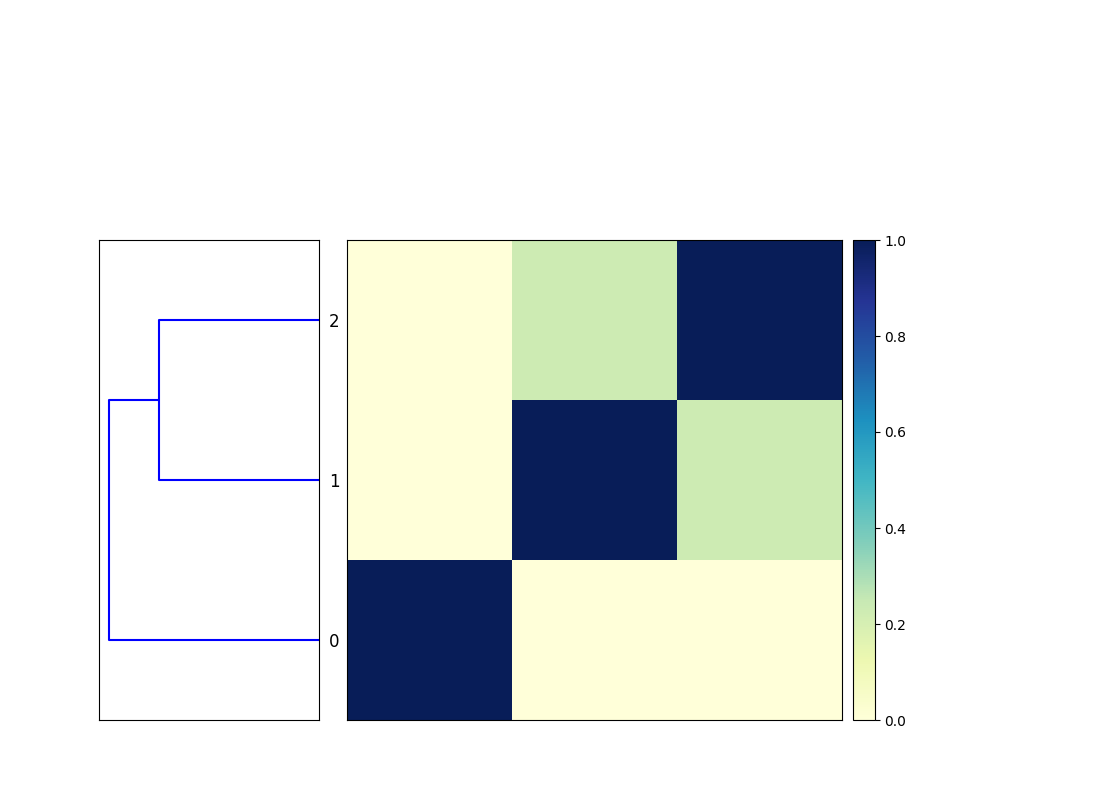

In [7]:
!sourmash plot genome_compare.mat

from IPython.display import Image
Image(filename='genome_compare.mat.matrix.png') 

and for the R aficionados, you can output a CSV version of the matrix:

In [8]:
!sourmash compare -k 31 *.sig --csv genome_compare.csv

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

loaded 3 signatures total.                                                     
downsampling to scaled value of 1000

0-CP001071.1 Akke...	[1. 0. 0.]
1-NC_009665.1 She...	[0.    1.    0.228]
2-NC_011663.1 She...	[0.    0.228 1.   ]
min similarity in matrix: 0.000


In [9]:
!cat genome_compare.csv


1.0,0.0,0.0
0.0,1.0,0.22846441947565543
0.0,0.22846441947565543,1.0


This is now a file that you can load into R and examine - see [our documentation](https://sourmash.readthedocs.io/en/latest/other-languages.html) on that.

## working with metagenomes

Let's make a fake metagenome:

In [10]:
!cat genomes/*.fa > fake-metagenome.fa
!sourmash compute -k 31 --scaled=1000 fake-metagenome.fa

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

setting num_hashes to 0 because --scaled is set
computing signatures for files: fake-metagenome.fa
Computing signature for ksizes: [31]
Computing only nucleotide (and not protein) signatures.
Computing a total of 1 signature(s).
... reading sequences from fake-metagenome.fa
calculated 1 signatures for 3 sequences in fake-metagenome.fa
saved 1 signature(s). Note: signature license is CC0.


We can use the `sourmash gather` command to see what's in it:

In [11]:
!sourmash gather fake-metagenome.fa.sig shew*.sig akker*.sig

== This is sourmash version 2.0.0a12.dev48+ga92289b. ==
== Please cite Brown and Irber (2016), doi:10.21105/joss.00027. ==

select query k=31 automatically.
loaded query: fake-metagenome.fa... (k=31, DNA)
loaded 3 signatures.                                                           


overlap     p_query p_match
---------   ------- -------
499.0 kbp     38.4%  100.0%    CP001071.1 Akkermansia muciniphila AT...
494.0 kbp     38.0%  100.0%    NC_009665.1 Shewanella baltica OS185,...
490.0 kbp     23.6%   62.7%    NC_011663.1 Shewanella baltica OS223,...

found 3 matches total;
the recovered matches hit 100.0% of the query



## Other pointers

[Sourmash: a practical guide](https://sourmash.readthedocs.io/en/latest/using-sourmash-a-guide.html)

[Classifying signatures taxonomically](https://sourmash.readthedocs.io/en/latest/classifying-signatures.html)

[Pre-built search databases](https://sourmash.readthedocs.io/en/latest/databases.html)

## A full list of notebooks

[An introduction to k-mers for genome comparison and analysis](kmers-and-minhash.ipynb)

[Some sourmash command line examples!](sourmash-examples.ipynb)

[Working with private collections of signatures.](sourmash-collections.ipynb)


